In [24]:
import ezomero
import os
from dotenv import load_dotenv
import matplotlib.pyplot as plt

# Load environment variables from .env file
load_dotenv(override = True)




True

In [25]:
conn = ezomero.connect(
    os.getenv("OMERO_USERNAME"), 
    os.getenv("OMERO_PASSWORD"), 
    os.getenv("OMERO_GROUP"),
    host=os.getenv("OMERO_HOST"),
    port=int(os.getenv("OMERO_PORT")),
    secure=os.getenv("OMERO_SECURE") == "True"
)

In [29]:
int_img_id = 35394
lab_img_id = 35395

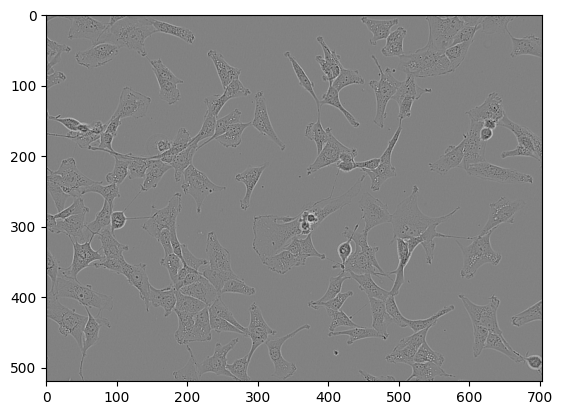

In [34]:
_, img = ezomero.get_image(conn,  int_img_id)
plt.imshow(img[0,0,:,:], cmap='gray')


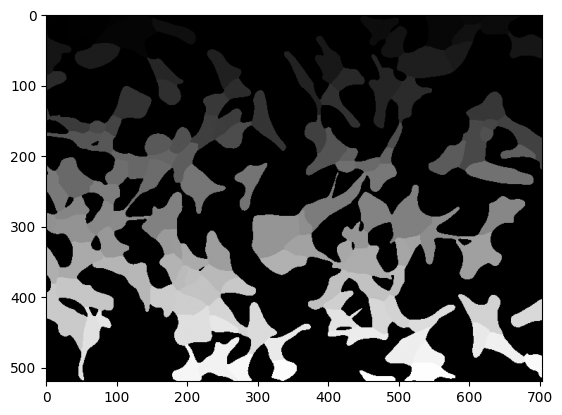

In [35]:
_, img = ezomero.get_image(conn,  lab_img_id)
plt.imshow(img[0,0,:,:], cmap='gray')

## define collection annotation

In [38]:
ns = 'ome/collection/'

d = {"version": "0.x",
     "type": "collection",
    'name': 'My Collection'
    }

annotation_id = ezomero.post_map_annotation(conn, "Image", 35394, d, ns="ome/collection/")

## Now add KVP to the nodes

In [ ]:
ns = 'ome/collection/nodes'

d = {"version": "0.x",
     "type": "Intensity",
    'name': 'My Collection'
    'collection_id': annotation_id
    }

collection_id = ezomero.post_map_annotation(conn, "Image", int_img_id, d, ns="ome/collection/")

In [ ]:
ns = 'ome/collection/nodes'

d = {"version": "0.x",
     "type": "label",
    'name': 'My Collection'
    'collection_id': annotation_id
    '"attributes": { "label": "cells"}
    }

collection_id = ezomero.post_map_annotation(conn, "Image", int_img_id, d, ns="ome/collection/")

In [ ]:
collection_id = ezomero.get_map_annotation_ids(conn, object_type="Image", object_id=35394, ns="ome/collection/")


NameError: name 'ezomero' is not defined

In [ ]:
#map annotation to other image collection
label_img_id = 35395
label_image = conn.getObject("Image", label_img_id)

annotation = conn.getObject("Annotation", map_ann[0])  
  
# Link the annotation to the image  
label_image.linkAnnotation(annotation)

<MapAnnotationWrapper id=10898>

## Clean up annotations

In [ ]:
#delete annotations
map_ann_to_delete = ezomero.get_map_annotation_ids(conn, object_type="Image", object_id=35394, ns="ome/collection/")

conn.deleteObjects('Annotation', map_ann_to_delete, wait=True)  

ef7a4b56-1ffc-4478-b911-3c496a892dcd/IHandle867aca04-8f82-43fa-8e02-896cd6faee5b -t -e 1.1:tcp -h 128.176.233.5 -p 44685 -t 60000

In [23]:
map_ann_to_delete

[10918, 10917, 10911]